# Identifying different species of Iris Flowers using Machine Learning

There are three different classes of iris species:
- setosa 
- versicolor 
- virginica

and they look like the following

![alt text](iris_classes.png "Title")

Now we will be changing gears and will be using machine learning to train a model that will be able to predict the species of the flower based on:
- sepal length (cm)
- sepal width (cm)

![alt text](iris.png "Title")

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :]
Y = iris.target


In [3]:
print("Feature names: {}".format(iris['feature_names']))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print("Target names: {}".format(iris['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [5]:
print("Type of data: {}".format(type(iris['data'])))


Type of data: <class 'numpy.ndarray'>


In [6]:
print("Shape of data: {}".format(iris['data'].shape))

Shape of data: (150, 4)


In [7]:
print('First five rows of data w/ values of features{}:\n'.format(iris['target_names']))
print(iris['data'][:5])

First five rows of data w/ values of features['setosa' 'versicolor' 'virginica']:

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [8]:
print("Target:\n{}".format(iris['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    iris['data'][:,:2], iris['target'], random_state=0)



In [10]:
ml_agent = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.



In [11]:
def train_NN(X_train, X_test, y_train, y_test, ml_agent):
    ml_agent.fit(X_train,y_train)
    print(ml_agent, '\n \n \n')
    print('*' * 10, 'CONFUSION MATRIX', '*' * 10)
    predictions = ml_agent.predict(X_test)
    print(confusion_matrix(y_test,predictions), '\n \n \n')
    print('*' * 10, 'CLASSIFICATION REPORT', '*' * 10)
    print(classification_report(y_test,predictions))
    
    return ml_agent

In [12]:
ml_agent = train_NN(X_train, X_test, y_train, y_test, ml_agent)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False) 
 
 

********** CONFUSION MATRIX **********
[[13  0  0]
 [ 0  8  8]
 [ 0  3  6]] 
 
 

********** CLASSIFICATION REPORT **********
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       0.73      0.50      0.59        16
          2       0.43      0.67      0.52         9

avg / total       0.75      0.71      0.72        38



In [13]:
def plot_predictions(X, Y, agent):
    h = .02  # step size in the mesh

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = agent.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    iris['data'][:,:2], iris['target'], random_state=0)


In [15]:
ml_agent = train_NN(X_train, X_test, y_train, y_test, ml_agent)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False) 
 
 

********** CONFUSION MATRIX **********
[[13  0  0]
 [ 0  8  8]
 [ 0  3  6]] 
 
 

********** CLASSIFICATION REPORT **********
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       0.73      0.50      0.59        16
          2       0.43      0.67      0.52         9

avg / total       0.75      0.71      0.72        38



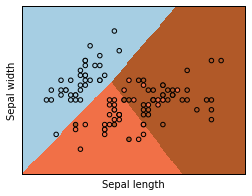

In [16]:
plot_predictions(X_train, y_train, ml_agent)

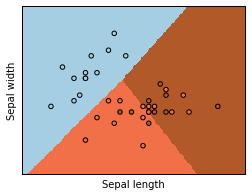

In [17]:
plot_predictions(X_test, y_test, ml_agent)